In [2]:
import os
import scanpy as sc
# import seaborn as sb
import numpy as np
# import matplotlib.pyplot as plt
import warnings
# import anndata as ad
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
# import gc
# import psutil

In [3]:
gc.collect()
cpu_idle = psutil.cpu_count()

# Get available memory in bytes, then convert to GB
ram_available_bytes = psutil.virtual_memory().available
ram_available_gb = ram_available_bytes / (1024 ** 3)

(cpu_idle, ram_available_gb)

NameError: name 'gc' is not defined

In [3]:
pwd

'/home/aih/shrey.parikh/PDAC/PDAC/code/notebooks'

In [2]:
os.chdir('/home/aih/shrey.parikh/PDAC/PDAC/processed_datasets/')

In [3]:
peng_PDAC = sc.read_h5ad('All_genes/Peng_PDAC.h5ad')

ding_PDAC = sc.read_h5ad('All_genes/Ding_PDAC.h5ad')

Lee_PDAC = sc.read_h5ad('All_genes/Lee_concat_PDAC.h5ad')

regev_PDAC = sc.read_h5ad('All_genes/Regev_PDAC.h5ad')

simeone_PDAC = sc.read_h5ad('All_genes/Simeone_concat.h5ad')

steele_PDAC = sc.read_h5ad('All_genes/Steele_concat_PDAC.h5ad')

caronni_PDAC = sc.read_h5ad('All_genes/Caronni_concat.h5ad')

zhang_PDAC = sc.read_h5ad('All_genes/Zhang_concat_PDAC.h5ad')

zenodo_PDAC = sc.read_h5ad('All_genes/zenodo_PDAC_new.h5ad')

adata_list = [ding_PDAC, Lee_PDAC, regev_PDAC, simeone_PDAC, steele_PDAC, peng_PDAC, caronni_PDAC, zhang_PDAC, zenodo_PDAC]

### DO NOT NORMALIZE

In [6]:
# count = 0
# for adata in adata_list:
#     count +=1
#     print(count)
#     sc.pp.normalize_total(adata, target_sum=1e4)
#     sc.pp.log1p(adata)

In [4]:
count = 0
for adata in adata_list:
    count +=1
    print(count)
    print(np.isnan(adata.X.toarray()).any())
    adata.layers['raw'] = adata.X

1
False
2
False
3
False
4
False
5
False
6
False
7
False
8
False
9
False


In [5]:
# The datasets which only had HVGs changed to all genes and moved to Processed_datasets
# Reloaded the datasets
for i, adata in zip(range(0, len(adata_list)),adata_list):
    print(i+1, adata.shape[1], adata.layers)

1 28643 Layers with keys: raw
2 21161 Layers with keys: raw
3 19546 Layers with keys: counts, raw
4 26053 Layers with keys: raw
5 20982 Layers with keys: raw
6 18008 Layers with keys: raw
7 21106 Layers with keys: raw
8 21913 Layers with keys: raw
9 34726 Layers with keys: raw


In [47]:
# List of Adatas manually concatenated

In [6]:
adata_concat = ad.concat(adata_list, join='outer', fill_value=0)

In [10]:
adata_concat.layers['raw']

<837983x40882 sparse matrix of type '<class 'numpy.float64'>'
	with 1520809088 stored elements in Compressed Sparse Row format>

In [8]:
sc.pp.normalize_total(adata_concat, target_sum=1e4)
sc.pp.log1p(adata_concat)

# adata normalized after concatenating and raw stored in one of the layers
# this helps in identifying biologically meaningful HVGs across all samples/datasets

In [9]:
adata_concat.write('/home/aih/shrey.parikh/PDAC/PDAC/concatenated_datasets/PDAC_concat_all_genes.h5ad')

In [30]:
# for adata in ["ding_PDAC", "Lee_PDAC", "regev_PDAC", "simeone_PDAC", "steele_PDAC", "peng_PDAC", "caronni_PDAC", "zhang_PDAC", "zenodo_PDAC"]:
#     del globals()[adata]

In [2]:
adata_concat = sc.read_h5ad('/home/aih/shrey.parikh/PDAC/PDAC/concatenated_datasets/PDAC_concat_all_genes.h5ad')
adata_concat_hvg_batch_key_dataset = adata_concat.copy()

In [ ]:
# del adata_concat

In [3]:
adata_concat_hvg_batch_key_dataset

AnnData object with n_obs × n_vars = 837983 × 40882
    obs: 'n_genes', 'ID', 'n_counts', 'log_counts', 'mt_frac', 'Dataset', 'sampleid', 'scrublet_scores', 'pid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts_sat', 'n_genes_sat', 'percent_mito', 'leiden', 'batch', 'Moffitt_basal', 'Moffitt_classical', 'Bailey_squamous', 'Bailey_progenitor', 'Collison_QM', 'Collison_classical', 'MALIGNANT CELLS', 'ACINAR', 'Alpha', 'Beta', 'Delta', 'Gamma', 'Episilon', 'ENDOCRINE', 'ENDOTHELIAL', 'Pan_Immune', 'AntigenPresentingCells', 'Monocytes_1', 'Monocytes_2', 'Macrophage', 'cDC1', 'cDC2', 'DC_activated', 'pDC', 'Mast', 'Eosinophils', 'Neutrophils', 'M0', 'M1', 'M2', 'Mast_Resting', 'Mast_activated', 'CD8_Tcells', 'CD4_Tcells', 'NK', 'CD8_gammadelta', 'CD8_exhausted', 'CD4_naive', 'CD4_memory_resting', 'CD4_memory_activated', 'CD4_follicular_helper', 'CD4_regulatory', 'NK_resting', 'NK_activated', 'B_cell', 'Plasma', 'Bcell_naive', 'Bcell_memory', 

In [3]:
genes_removed = '^RB|^MT'
adata_concat_hvg_batch_key_dataset = adata_concat_hvg_batch_key_dataset[:, ~adata_concat_hvg_batch_key_dataset.var.index.str.contains(genes_removed, regex=True)]

In [4]:
adata_concat_hvg_batch_key_dataset.var_names_make_unique()

In [20]:
# np.isnan(adata_concat_hvg_batch_key_dataset.X.toarray()).any()

In [109]:
# np.isnan(peng_PDAC.X.toarray()).any()

# np.isnan(peng_PDAC.X).any()

# peng_PDAC.X = peng_PDAC.X.toarray()

# peng_PDAC

# rows_with_no_nans = ~np.isnan(peng_PDAC.X).any(axis=1)
# cols_with_no_nans = ~np.isnan(peng_PDAC.X).any(axis=0)

# # Subset the AnnData object to only include those rows and columns
# peng_PDAC = peng_PDAC[rows_with_no_nans, :]
# peng_PDAC = peng_PDAC[:, cols_with_no_nans]

# peng_PDAC changed from HVGs to all genes to avoid nans


In [5]:
sc.pp.highly_variable_genes(adata_concat_hvg_batch_key_dataset, flavor='cell_ranger',  batch_key='Dataset')

In [ ]:
adata_concat_hvg_batch_key_dataset.var

,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
7SK,True,0.016451,1.068529,2.429462,1,False
7SK-1,False,0.000911,0.109499,-0.021689,0,False
7SK.1,False,0.000594,0.099033,0.010932,0,False
7SK.2,False,0.003030,0.120382,0.161763,1,False
<class 'str'>,False,0.000799,0.105880,0.046208,0,False
...,...,...,...,...,...,...
bP-21264C1.2,False,0.002115,0.097588,-0.032957,0,False
hsa-mir-1199,False,0.007951,0.249037,0.091758,1,False
hsa-mir-150,False,0.000048,0.106564,0.102145,0,False
hsa-mir-335,False,0.000131,0.227654,0.130219,0,False


In [6]:
adata_concat_hvg_batch_key_dataset_hvg = adata_concat_hvg_batch_key_dataset[:,adata_concat_hvg_batch_key_dataset.var.highly_variable]

In [7]:
adata_concat_hvg_batch_key_dataset_hvg.var

,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
A1BG,True,0.126808,1.411134,1.220640,5,False
A2M,True,0.289354,1.855288,7.168276,11,True
A2M-AS1,True,0.018248,1.417509,2.048292,5,False
AADAC,True,0.026345,1.396066,0.635133,3,False
AAK1,True,0.479939,1.197470,1.059423,9,False
...,...,...,...,...,...,...
ZNF92,True,0.079414,1.390170,0.794401,6,False
ZNF98,True,0.017979,0.899776,0.541815,2,False
ZRSR2,True,0.115627,1.355138,0.820146,7,False
ZSCAN18,True,0.100152,1.348431,0.723607,7,False


In [8]:
adata_concat_hvg_batch_key_dataset_hvg.write('/home/aih/shrey.parikh/PDAC/PDAC/concatenated_datasets/PDAC_concat_hvg_batch_key_datasets_hvg.h5ad')

In [29]:
# test = sc.read_h5ad('/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di35nod/PDAC_data/PDAC_concat_hvg_batch_key_datasets_hvg.h5ad')

In [131]:
%matplotlib inline

In [20]:
# Initialize a dictionary to hold the zero expression proportions for each dataset
proportions_zeros_all_datasets = {}
datasets = adata_concat_hvg_batch_key_dataset_hvg.obs['Dataset'].unique()
hvg_list = adata_concat_hvg_batch_key_dataset_hvg.var_names.tolist()
sum_zeros_all_datasets = {}

# Loop through each dataset name and calculate the proportion of zeros for HVGs
for dataset_name in datasets:
    # Subset the adata object for the current dataset
    dataset_expression = adata_concat_hvg_batch_key_dataset_hvg[adata_concat_hvg_batch_key_dataset_hvg.obs['Dataset'] == dataset_name, hvg_list].X
    proportion_zeros = np.array((dataset_expression == 0).mean(axis=0)).ravel()
    proportions_zeros_all_datasets[dataset_name] = proportion_zeros
    sum_zeros = np.array((dataset_expression == 0).sum(axis=0)).ravel()
    sum_zeros_all_datasets[dataset_name] = sum_zeros

/home/aih/shrey.parikh/miniconda3/envs/PDAC/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/aih/shrey.parikh/miniconda3/envs/PDAC/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/aih/shrey.parikh/miniconda3/envs/PDAC/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/aih/shrey.parikh/miniconda3/envs/PDAC/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3526: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient

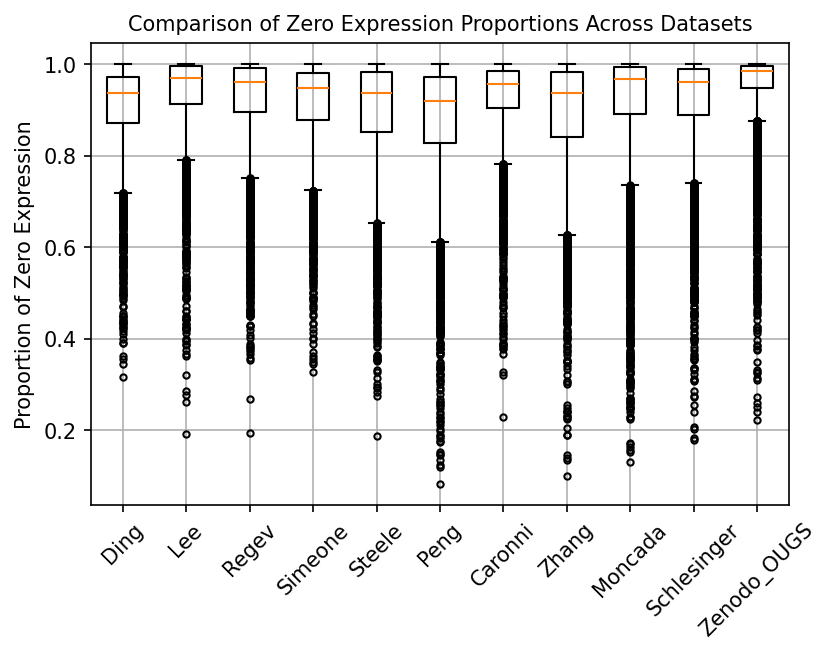

In [22]:
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 150
data_to_plot = [proportions for proportions in proportions_zeros_all_datasets.values()]
labels = list(proportions_zeros_all_datasets.keys())
flierprops = dict(marker='o', markersize=3, linestyle='none')
plt.boxplot(data_to_plot, labels=labels, flierprops=flierprops)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Proportion of Zero Expression', fontsize=10)
plt.title('Comparison of Zero Expression Proportions Across Datasets', fontsize=10)
plt.grid(visible=True)
plt.show()

In [9]:
del adata_concat_hvg_batch_key_dataset

In [10]:
# adata_concat = sc.read_h5ad('/home/aih/shrey.parikh/PDAC/PDAC/concatenated_datasets/PDAC_concat_all_genes.h5ad')
adata_concat_hvg_batch_key_samples = adata_concat.copy()

In [12]:
genes_removed = '^RB|^MT'
adata_concat_hvg_batch_key_samples = adata_concat_hvg_batch_key_samples[:, ~adata_concat_hvg_batch_key_samples.var.index.str.contains(genes_removed, regex=True)]
adata_concat_hvg_batch_key_samples.var_names_make_unique()

In [14]:
adata_concat_hvg_batch_key_samples

AnnData object with n_obs × n_vars = 837983 × 40675
    obs: 'n_genes', 'ID', 'n_counts', 'log_counts', 'mt_frac', 'Dataset', 'sampleid', 'scrublet_scores', 'pid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts_sat', 'n_genes_sat', 'percent_mito', 'leiden', 'batch', 'Moffitt_basal', 'Moffitt_classical', 'Bailey_squamous', 'Bailey_progenitor', 'Collison_QM', 'Collison_classical', 'MALIGNANT CELLS', 'ACINAR', 'Alpha', 'Beta', 'Delta', 'Gamma', 'Episilon', 'ENDOCRINE', 'ENDOTHELIAL', 'Pan_Immune', 'AntigenPresentingCells', 'Monocytes_1', 'Monocytes_2', 'Macrophage', 'cDC1', 'cDC2', 'DC_activated', 'pDC', 'Mast', 'Eosinophils', 'Neutrophils', 'M0', 'M1', 'M2', 'Mast_Resting', 'Mast_activated', 'CD8_Tcells', 'CD4_Tcells', 'NK', 'CD8_gammadelta', 'CD8_exhausted', 'CD4_naive', 'CD4_memory_resting', 'CD4_memory_activated', 'CD4_follicular_helper', 'CD4_regulatory', 'NK_resting', 'NK_activated', 'B_cell', 'Plasma', 'Bcell_naive', 'Bcell_memory', 

In [17]:
sc.pp.highly_variable_genes(adata_concat_hvg_batch_key_samples, flavor='cell_ranger',  batch_key='ID')


In [18]:
adata_concat_hvg_batch_key_samples_hvg = adata_concat_hvg_batch_key_samples[:,adata_concat_hvg_batch_key_samples.var.highly_variable]

In [20]:
adata_concat_hvg_batch_key_samples_hvg

View of AnnData object with n_obs × n_vars = 837983 × 3781
    obs: 'n_genes', 'ID', 'n_counts', 'log_counts', 'mt_frac', 'Dataset', 'sampleid', 'scrublet_scores', 'pid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts_sat', 'n_genes_sat', 'percent_mito', 'leiden', 'batch', 'Moffitt_basal', 'Moffitt_classical', 'Bailey_squamous', 'Bailey_progenitor', 'Collison_QM', 'Collison_classical', 'MALIGNANT CELLS', 'ACINAR', 'Alpha', 'Beta', 'Delta', 'Gamma', 'Episilon', 'ENDOCRINE', 'ENDOTHELIAL', 'Pan_Immune', 'AntigenPresentingCells', 'Monocytes_1', 'Monocytes_2', 'Macrophage', 'cDC1', 'cDC2', 'DC_activated', 'pDC', 'Mast', 'Eosinophils', 'Neutrophils', 'M0', 'M1', 'M2', 'Mast_Resting', 'Mast_activated', 'CD8_Tcells', 'CD4_Tcells', 'NK', 'CD8_gammadelta', 'CD8_exhausted', 'CD4_naive', 'CD4_memory_resting', 'CD4_memory_activated', 'CD4_follicular_helper', 'CD4_regulatory', 'NK_resting', 'NK_activated', 'B_cell', 'Plasma', 'Bcell_naive', 'Bcell_me

In [10]:
# Initialize a dictionary to hold the zero expression proportions for each dataset
proportions_zeros_all_datasets_samples = {}
datasets = adata_concat_hvg_batch_key_samples_hvg.obs['Dataset'].unique()
hvg_list = adata_concat_hvg_batch_key_samples_hvg.var_names.tolist()
# sum_zeros_all_datasets = {}

# Loop through each dataset name and calculate the proportion of zeros for HVGs
for dataset_name in datasets:
    # Subset the adata object for the current dataset
    dataset_expression = adata_concat_hvg_batch_key_samples_hvg[adata_concat_hvg_batch_key_samples_hvg.obs['Dataset'] == dataset_name, hvg_list].X
    proportion_zeros = np.array((dataset_expression == 0).mean(axis=0)).ravel()
    proportions_zeros_all_datasets_samples[dataset_name] = proportion_zeros
    # sum_zeros = np.array((dataset_expression == 0).sum(axis=0)).ravel()
    # sum_zeros_all_datasets[dataset_name] = sum_zeros

/dss/dsshome1/05/di35nod/miniconda3/envs/preprocess/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3526: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/dss/dsshome1/05/di35nod/miniconda3/envs/preprocess/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3526: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/dss/dsshome1/05/di35nod/miniconda3/envs/preprocess/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3526: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/dss/dsshome1/05/di35nod/miniconda3/envs/preprocess/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3526: SparseEfficiencyWarning: Comparing a sparse matri

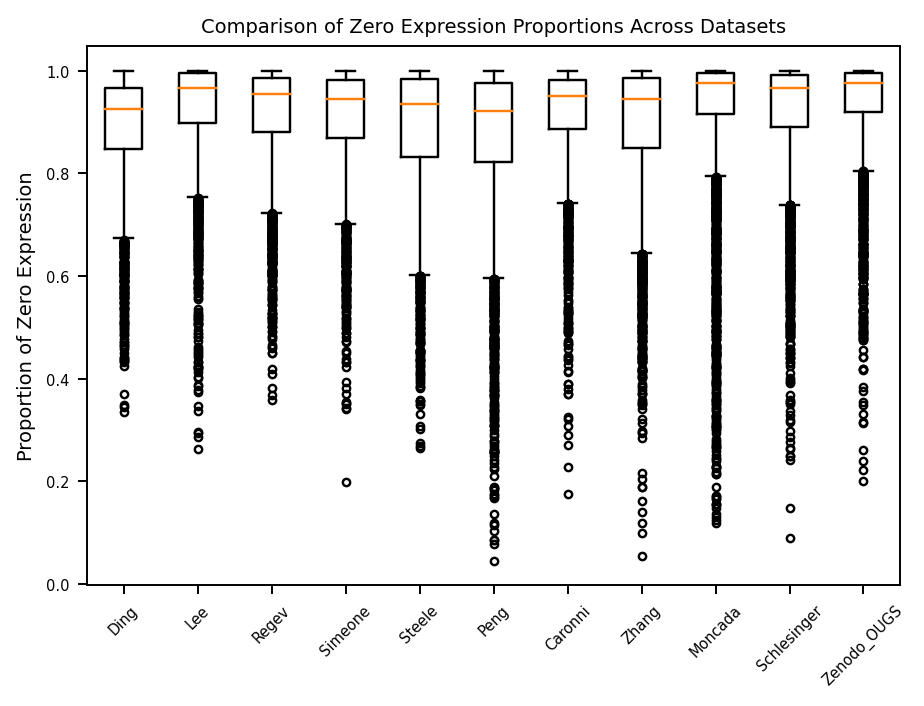

In [11]:
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 175
data_to_plot = [proportions for proportions in proportions_zeros_all_datasets_samples.values()]
labels = list(proportions_zeros_all_datasets_samples.keys())
flierprops = dict(marker='o', markersize=3, linestyle='none')
plt.boxplot(data_to_plot, labels=labels, flierprops=flierprops)
plt.xticks(rotation=45, fontsize=6)
plt.yticks(fontsize=6)
plt.ylabel('Proportion of Zero Expression', fontsize=8)
plt.title('Comparison of Zero Expression Proportions Across Datasets', fontsize=8)
plt.show()

In [ ]:
#Compute UMAP with > neighbours
#GEPs from unsupervised or manually curate it
#Do GEPs overcomplicate things?


In [21]:
adata_concat_hvg_batch_key_samples_hvg.write('/home/aih/shrey.parikh/PDAC/PDAC/concatenated_datasets/PDAC_concat_hvg_batch_key_samples_hvg.h5ad')

In [6]:
# adata_concat_hvg_batch_key_samples_hvg = sc.read_h5ad('/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di35nod/PDAC_data/concatenated_datasets/PDAC_concat_hvg_batch_key_samples_hvg.h5ad')

In [5]:
# adata_concat_hvg_batch_key_dataset_hvg = sc.read_h5ad('/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di35nod/PDAC_data/concatenated_datasets/PDAC_concat_hvg_batch_key_datasets_hvg.h5ad')

# Try the Manual HLCA approach

## Shift to ICB cluster

In [9]:
os.chdir('/home/aih/shrey.parikh/PDAC/PDAC/')

In [46]:
adata_concat = sc.read_h5ad('concatenated_datasets/PDAC_concat_all_genes.h5ad')

In [24]:
adata_concat.shape

(837983, 40882)

In [49]:
genes_removed = '^RB|^MT'
adata_concat = adata_concat[:, ~adata_concat.var.index.str.contains(genes_removed, regex=True)]

In [26]:
adata_concat.shape

(837983, 40675)

## Try the Manual Approach

In [27]:
def calculate_hvgs_for_each_dataset(adata, dataset_column='dataset'):
    unique_datasets = adata.obs[dataset_column].unique()
    hvg_lists = {}
    
    for dataset in unique_datasets:
        # Subset the adata object for the current dataset
        adata_subset = adata[adata.obs[dataset_column] == dataset].copy()
        
        # Calculate HVGs for the subset
        sc.pp.highly_variable_genes(adata_subset)
        
        # Store the list of HVGs
        hvg_lists[dataset] = adata_subset.var[adata_subset.var['highly_variable']].index.tolist()
    
    return hvg_lists


In [28]:
hvg_lists = calculate_hvgs_for_each_dataset(adata_concat, dataset_column='Dataset')

In [29]:
from itertools import combinations

def tiered_selection_of_hvgs(hvg_lists, max_genes=8000):
    datasets = list(hvg_lists.keys())
    selected_hvgs = set()

    # Start with HVGs common to all datasets
    common_hvgs = set.intersection(*[set(hvg_lists[dataset]) for dataset in datasets])
    selected_hvgs.update(common_hvgs)

    # Iteratively include HVGs common to all but one, two, ... datasets
    for i in range(1, len(datasets)):
        if len(selected_hvgs) >= max_genes:
            break  # Stop if we've reached the max number of genes
        
        for excluded_datasets in combinations(datasets, i):
            included_datasets = set(datasets) - set(excluded_datasets)
            hvgs_this_round = set.intersection(*[set(hvg_lists[ds]) for ds in included_datasets])
            selected_hvgs.update(hvgs_this_round)

            if len(selected_hvgs) >= max_genes:
                break  # Stop if we've reached the max number of genes

    # Return up to max_genes from the selected HVGs
    return list(selected_hvgs)[:max_genes]

In [30]:
selected_hvgs = tiered_selection_of_hvgs(hvg_lists)

In [31]:
len(selected_hvgs)

8000

In [32]:
adata_concat_8000_hvg = adata_concat[:, adata_concat.var_names.isin(selected_hvgs)]

In [33]:
adata_concat_8000_hvg.obs['Condition'] = np.where(adata_concat_8000_hvg.obs.Dataset == 'Regev', 'snRNA', 'scRNA')

In [20]:
os.listdir('concatenated_datasets/')

['PDAC_concat_all_genes.h5ad',
 'PDAC_concat_hvg_batch_key_datasets_hvg.h5ad',
 'tiered_HVGs.pkl',
 'PDAC_concat_hvg_batch_key_samples_hvg.h5ad',
 '.ipynb_checkpoints']

In [34]:
adata_concat_8000_hvg.write('concatenated_datasets/PDAC_concat_hvg_manual_HLCA_8000.h5ad')

## Increase the n_genes to 8000 with batch_key='Dataset' and batch_key='Donor'

In [22]:
adata_concat.shape

(837983, 40882)

In [23]:
sc.pp.highly_variable_genes(adata_concat, n_top_genes=8000, flavor='cell_ranger',  batch_key='Dataset')

In [24]:
adata_concat_hvg_batch_key_dataset_8000 = adata_concat[:, adata_concat.var.highly_variable]

In [25]:
adata_concat_hvg_batch_key_dataset_8000.shape

(837983, 8000)

In [26]:
adata_concat_hvg_batch_key_dataset_8000.layers

LayersView with keys: counts, raw

In [28]:
adata_concat_hvg_batch_key_dataset_8000.write('/home/aih/shrey.parikh/PDAC/PDAC/concatenated_datasets/PDAC_concat_hvg_batch_key_datasets_hvg_8000.h5ad')

In [29]:
sc.pp.highly_variable_genes(adata_concat, n_top_genes=8000, flavor='cell_ranger',  batch_key='ID')

In [30]:
adata_concat_hvg_batch_key_samples_8000 = adata_concat[:, adata_concat.var.highly_variable]

In [31]:
adata_concat_hvg_batch_key_samples_8000.shape

(837983, 8000)

In [33]:
adata_concat_hvg_batch_key_samples_8000.write('/home/aih/shrey.parikh/PDAC/PDAC/concatenated_datasets/PDAC_concat_hvg_batch_key_samples_hvg_8000.h5ad')

In [5]:
os.chdir('/home/aih/shrey.parikh/PDAC/PDAC/concatenated_datasets/')

adata_donor= sc.read_h5ad('PDAC_concat_hvg_batch_key_samples_hvg.h5ad')

adata_dataset = sc.read_h5ad('PDAC_concat_hvg_batch_key_datasets_hvg.h5ad')

adata_dataset_8000 = sc.read_h5ad('PDAC_concat_hvg_batch_key_datasets_hvg_8000.h5ad')

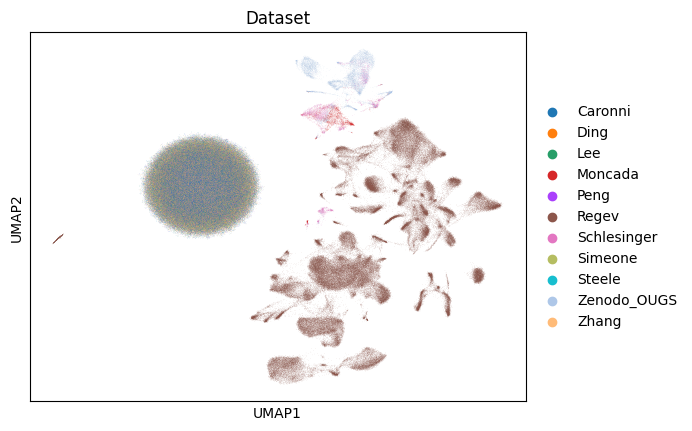

In [6]:
sc.pl.umap(adata_donor, color='Dataset')

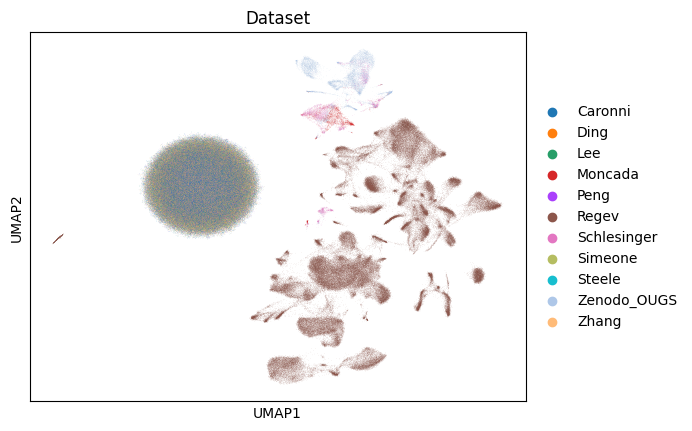

In [7]:
sc.pl.umap(adata_dataset, color='Dataset')

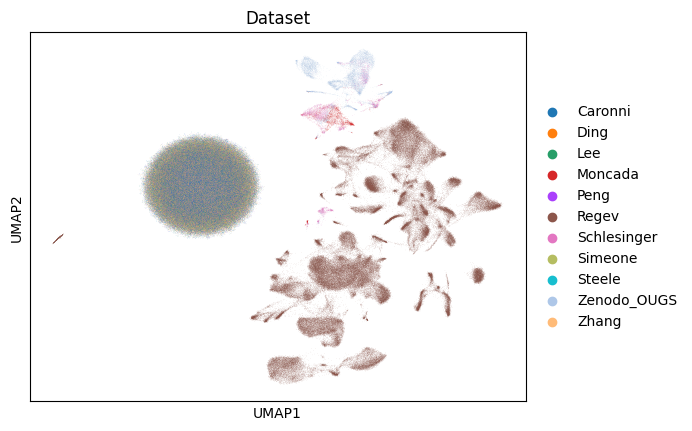

In [8]:
sc.pl.umap(adata_dataset_8000, color='Dataset')